In [1]:
print("""This script was written in support of the experiments carried out in:
Nic Ezzell, Lev Barash, Itay Hen, Exact and universal quantum Monte Carlo estimators for energy susceptibility and fidelity susceptibility, arXiv:2408.03924 (2024).""")

This script was written in support of the experiments carried out in:
Nic Ezzell, Lev Barash, Itay Hen, Exact and universal quantum Monte Carlo estimators for energy susceptibility and fidelity susceptibility, arXiv:2408.03924 (2024).


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pandas as pd
import sys
import scipy
sys.path.append("../../utils")
from exact_calculations import prl_gs_gtau, prl_beta_gtau, prl_gs_fidsus

matplotlib.style.use("./style.mplstyle")
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r"\usepackage{amsmath}\usepackage{amsfonts}")

In [3]:
fname = "../data/zhang_prl_rot_model_correlator_data_2024-05-22_10-23-51.csv"
cols = ["n", "tau", "lam", "beta", "H1", "H1_std", "corr", "corr_std", "rng", "eps" ,"l", "Tsteps", "steps", "stepsPerMeasurement", "sign", "sign_std", "q", "qmax", "time"]
df = pd.read_csv(fname, names=cols, skiprows=1)
df['gtau'] = df['corr'] - (df['H1'])**2
df['taugtau'] = df['tau'] * df['gtau']
df.head()

,n,tau,lam,beta,H1,H1_std,corr,corr_std,rng,eps,...,Tsteps,steps,stepsPerMeasurement,sign,sign_std,q,qmax,time,gtau,taugtau
0,100,0.000000,1.0,20.0,-0.931587,0.007079,1.867062,0.014055,3026438146,NaN,...,100000,1000000,10,0.99946,0.00036,2.61362,8,15.77,0.999207,0.000000
1,100,0.100503,1.0,20.0,-0.931587,0.007079,1.841260,0.013751,3026438146,NaN,...,100000,1000000,10,0.99946,0.00036,2.61362,8,17.78,0.973404,0.097830
2,100,0.201005,1.0,20.0,-0.931587,0.007079,1.816347,0.013486,3026438146,NaN,...,100000,1000000,10,0.99946,0.00036,2.61362,8,17.74,0.948492,0.190652
3,100,0.301508,1.0,20.0,-0.931587,0.007079,1.792232,0.013257,3026438146,NaN,...,100000,1000000,10,0.99946,0.00036,2.61362,8,17.71,0.924377,0.278707
4,100,0.402010,1.0,20.0,-0.931587,0.007079,1.768849,0.013059,3026438146,NaN,...,100000,1000000,10,0.99946,0.00036,2.61362,8,17.75,0.900993,0.362208


In [4]:
tau_vals = np.sort(np.unique(df.tau))
# exact T = 0 values
gs_gtau = [prl_gs_gtau(1.0, tau) for tau in tau_vals]
gs_taugtau = [tau * prl_gs_gtau(1.0, tau) for tau in tau_vals]
exact_gs_df = pd.DataFrame({'tau': tau_vals, 'gtau': gs_gtau, 'taugtau': gs_taugtau})
# exact beta = 20 values
beta_gtau = [prl_beta_gtau(1.0, 20.0, tau) for tau in tau_vals]
beta_taugtau = [tau * prl_beta_gtau(1.0, 20.0, tau) for tau in tau_vals]
exact_beta_df = pd.DataFrame({'tau': tau_vals, 'gtau': beta_gtau, 'taugtau': beta_taugtau})

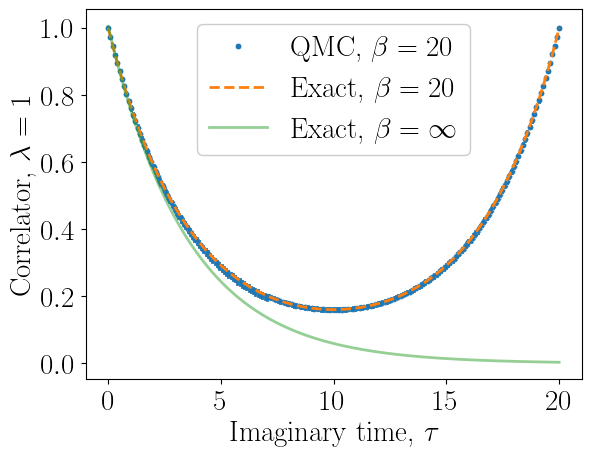

In [5]:
ax = sns.lineplot(data=df, x='tau', y='gtau', marker='o', linestyle='', err_style='bars', markersize=5, label=r"QMC, $\beta=20$")
sns.lineplot(data=exact_beta_df, x='tau', y='gtau', label=r"Exact, $\beta=20$", linestyle="dashed")
sns.lineplot(data=exact_gs_df, x='tau', y='gtau', label=r"Exact, $\beta = \infty$", alpha=0.5)
#ax.set_xlabel(r"$\tau$")
ax.set_xlabel(r"Imaginary time, $\tau$")
ax.set_ylabel(r"Correlator, $\lambda = 1$")
#ax.set_ylabel(r"$G^{\beta}(\tau; \lambda=1)$")
fig = ax.get_figure()
fig.savefig("figures/fig2a_rot_gtau_plot.pdf", dpi=800, bbox_inches="tight")

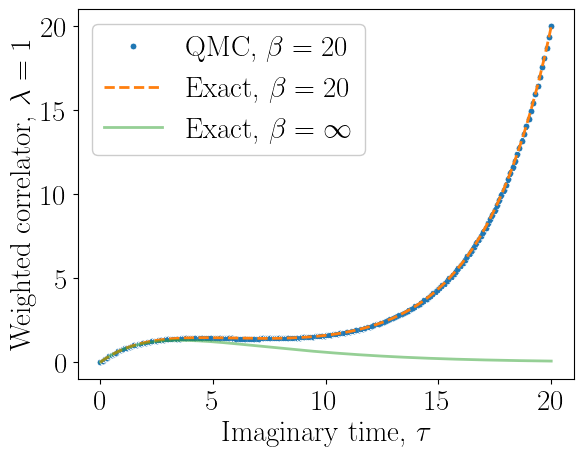

In [6]:
ax = sns.lineplot(data=df, x='tau', y='taugtau', marker='o', linestyle='', err_style='bars', markersize=5, label=r"QMC, $\beta=20$")
sns.lineplot(data=exact_beta_df, x='tau', y='taugtau', label=r"Exact, $\beta=20$", linestyle="dashed")
sns.lineplot(data=exact_gs_df, x='tau', y='taugtau', label=r"Exact, $\beta = \infty$", alpha=0.5)
#ax.set_xlabel(r"$\tau$")
ax.set_xlabel(r"Imaginary time, $\tau$")
ax.set_ylabel(r"Weighted correlator, $\lambda = 1$")
#ax.set_ylabel(r"$\tau G^{\beta}(\tau; \lambda=1)$")
fig = ax.get_figure()
fig.savefig("figures/fig2b_rot_taugtau_plot.pdf", dpi=800, bbox_inches="tight")